Bonus dataset used: https://data.buffalony.gov/Public-Safety/Received-Traffic-Incident-Calls/6at3-hpb5/about_data


In [61]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import math

!pip install utils

In [62]:
from google.colab import drive
drive.mount('/content/drive')
%cd ..
%cd /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive
/content/drive/MyDrive


In [63]:
#2
#reading dataset #2
df = pd.read_csv("Rental_Registry_20241010.csv")
print(df.dtypes)

Unique Key                  object
Application Key              int64
License Number              object
License Datetime            object
License Status              object
Status Datetime             object
Expiration Datetime         object
PRCLID                      object
Issued Datetime             object
Address                     object
City                        object
State                       object
Zip Code                     int64
Location                    object
Latitude                   float64
Longitude                  float64
Neighborhood                object
Police District             object
Council District            object
Census Tract                object
Census Block Group          object
Census Block                object
Milestone                   object
Lead Compliance             object
SBL                         object
Print Key                   object
Council District 2011       object
Census Tract 2010           object
Census Block Group 2

<ipython-input-63-4d24e5ab8428>:3: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Rental_Registry_20241010.csv")


In [64]:
#2 basic statistics
#From Rebecca Abraham's assignement A0 reusing the code to get stastics

mean_values = df.mean(numeric_only=True)
print("The mean values:",mean_values,sep='\n')
print('\n')

median_values = df.median(numeric_only=True)
print("The median values:",median_values,sep='\n')
print('\n')

mode_values = df.mode(numeric_only=True)
print("The mode values:",mode_values,sep='\n')
print('\n')

The mean values:
Application Key       9.161597e+06
Zip Code              1.421180e+04
Latitude              4.291360e+01
Longitude            -7.884163e+01
Tax District          1.470087e+05
TRACTCE20             5.335218e+03
GEOID20_tract         3.602901e+10
GEOID20_blockgroup    3.602901e+11
GEOID20_block         3.602901e+14
dtype: float64


The median values:
Application Key       9.028350e+06
Zip Code              1.421200e+04
Latitude              4.291721e+01
Longitude            -7.883229e+01
Tax District          1.470100e+05
TRACTCE20             4.300000e+03
GEOID20_tract         3.602900e+10
GEOID20_blockgroup    3.602900e+11
GEOID20_block         3.602900e+14
dtype: float64


The mode values:
       Application Key  Zip Code   Latitude  Longitude  Tax District  \
0               181314   14215.0  42.907146 -78.870848      147010.0   
1               181317       NaN        NaN        NaN           NaN   
2               181319       NaN        NaN        NaN           Na

In [65]:
#3 and #4 steps

df.drop_duplicates(inplace=True)

#since big dataset makes sense to drop the nan values than preprocessing them
df.dropna(inplace=True)

missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Unique Key                 0
Application Key            0
License Number             0
License Datetime           0
License Status             0
Status Datetime            0
Expiration Datetime        0
PRCLID                     0
Issued Datetime            0
Address                    0
City                       0
State                      0
Zip Code                   0
Location                   0
Latitude                   0
Longitude                  0
Neighborhood               0
Police District            0
Council District           0
Census Tract               0
Census Block Group         0
Census Block               0
Milestone                  0
Lead Compliance            0
SBL                        0
Print Key                  0
Council District 2011      0
Census Tract 2010          0
Census Block Group 2010    0
Census Block 2010          0
Tax District               0
TRACTCE20                  0
GEOID20_tract              0
GEOID20_blockgroup        

In [66]:
df

,Unique Key,Application Key,License Number,License Datetime,License Status,Status Datetime,Expiration Datetime,PRCLID,Issued Datetime,Address,...,Print Key,Council District 2011,Census Tract 2010,Census Block Group 2010,Census Block 2010,Tax District,TRACTCE20,GEOID20_tract,GEOID20_blockgroup,GEOID20_block
1,90023921005100002014000,9002392,RR-3392,2005-01-25T00:00:00,Active,2024-03-10T00:00:00,2025-03-01T00:00:00,1005100002014000,2024-03-10T00:00:00,201 LANDON,...,100.51-2-14,ELLICOTT,33.02,2,2009,147005.0,3302.0,3.602900e+10,3.602900e+11,3.602900e+14
2,90159391112700005022000,9015939,RR-16939,2005-01-25T00:00:00,Active,2024-04-14T00:00:00,2024-03-01T00:00:00,1112700005022000,2023-03-10T00:00:00,181 GUILFORD,...,111.27-5-22,FILLMORE,166,3,3003,147004.0,16600.0,3.602902e+10,3.602902e+11,3.602902e+14
3,100292901013200003015000,10029290,RR17-10029290,2017-06-21T00:00:00,Active,2024-03-04T00:00:00,2025-03-01T00:00:00,1013200003015000,2024-03-04T00:00:00,138 ZENNER,...,101.32-3-15,FILLMORE,36,1,1008,147011.0,3600.0,3.602900e+10,3.602900e+11,3.602900e+14
4,90230691116000001021000,9023069,RR-24069,2005-01-25T00:00:00,Active,2024-03-06T00:00:00,2025-03-01T00:00:00,1116000001021000,2024-03-06T00:00:00,48 TOWNSEND,...,111.60-1-21,FILLMORE,16,1,1012,147004.0,1602.0,3.602900e+10,3.602900e+11,3.602900e+14
5,90402861113400002010100,9040286,RR-41287,2005-01-25T00:00:00,Active,2024-04-14T00:00:00,2022-03-01T00:00:00,1113400002010100,2021-03-09T00:00:00,530 MONROE,...,111.34-2-10.1,ELLICOTT,166,4,4005,147004.0,16600.0,3.602902e+10,3.602902e+11,3.602902e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24635,90229661115800002019000,9022966,RR-23966,2005-01-25T00:00:00,Active,2024-04-14T00:00:00,2021-03-01T00:00:00,1115800002019000,2020-01-07T00:00:00,226 MONROE,...,111.58-2-19,ELLICOTT,15,2,2013,147004.0,1500.0,3.602900e+10,3.602900e+11,3.602900e+14
24636,90409160898200004081000,9040916,RR-41917,2005-01-25T00:00:00,Active,2024-04-14T00:00:00,2016-03-01T00:00:00,0898200004081000,2009-03-13T00:00:00,178 NORTHLAND,...,89.82-4-81,MASTEN,33.01,1,1002,147005.0,3301.0,3.602900e+10,3.602900e+11,3.602900e+14
24637,90345520907500005024000,9034552,RR-35553,2005-01-25T00:00:00,Active,2024-04-14T00:00:00,2021-03-01T00:00:00,0907500005024000,2020-01-07T00:00:00,16 CITY LINE,...,90.75-5-24,UNIVERSITY,41,4,4000,147010.0,4100.0,3.602900e+10,3.602900e+11,3.602900e+14
24638,90022621234200002033000,9002262,RR-3262,2005-01-25T00:00:00,Active,2024-02-21T00:00:00,2025-03-01T00:00:00,1234200002033000,2024-02-21T00:00:00,141 CABLE,...,123.42-2-33,LOVEJOY,19,3,3001,147014.0,1900.0,3.602900e+10,3.602900e+11,3.602900e+14


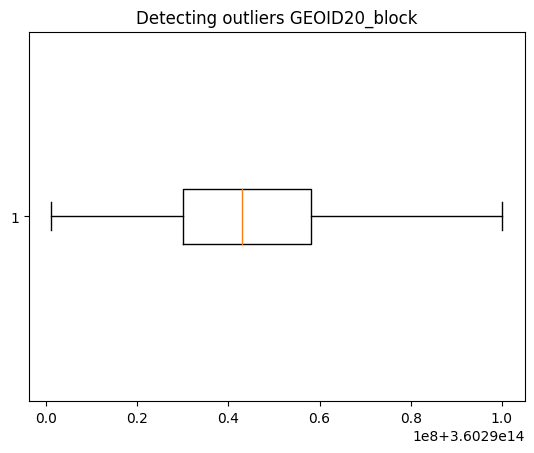

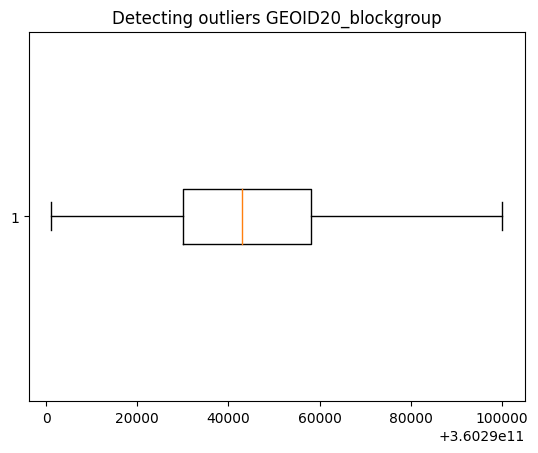

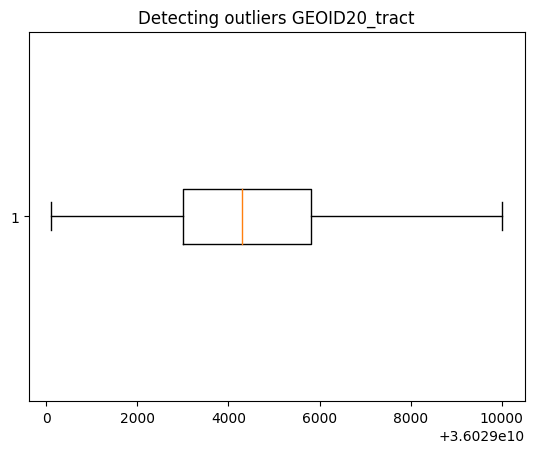

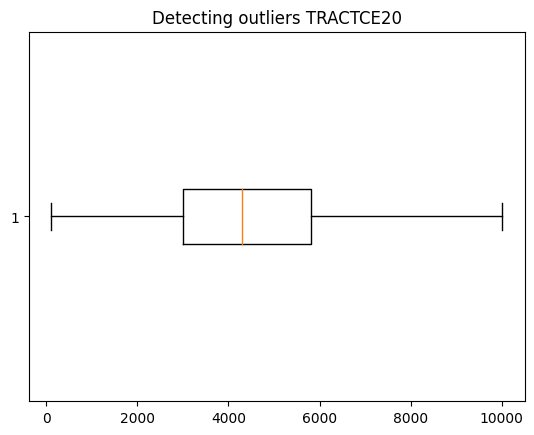

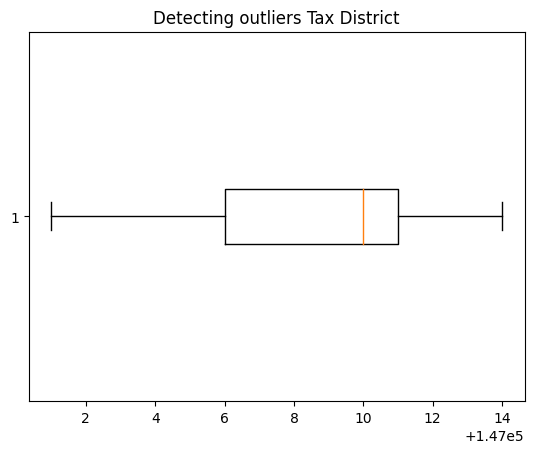

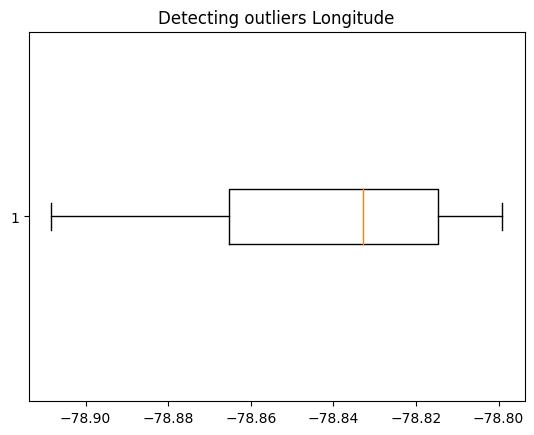

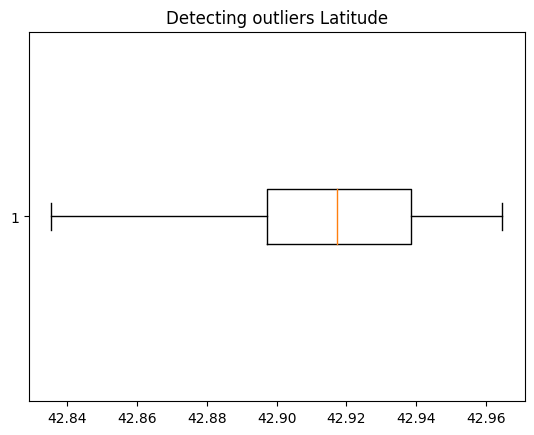

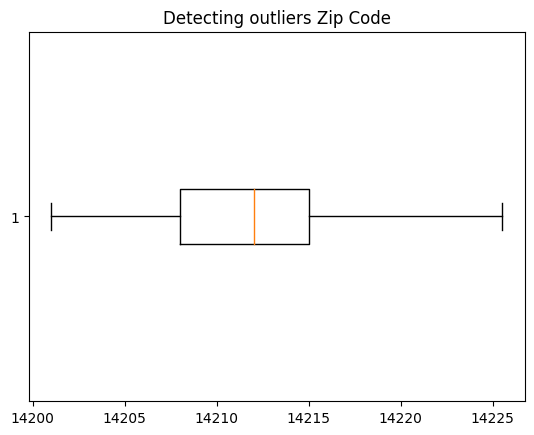

In [67]:
#5

columns_numeric = ['GEOID20_block','GEOID20_blockgroup', 'GEOID20_tract','TRACTCE20', 'Tax District', 'Longitude', 'Latitude', 'Zip Code' ]

# using the same code as used for preprocessing dataset 1
for col in columns_numeric:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)

  inter_quatile_rng = q3 - q1
  lower_bound = q3 + (1.5 * inter_quatile_rng)
  upper_bound = q1 - (1.5 * inter_quatile_rng)

  df[col] = df[col].clip(lower_bound,upper_bound)

#to check if the outliers are fixed
for col in columns_numeric:
  plt.boxplot(df[col], vert=False)
  plt.title(f"Detecting outliers {col}")
  plt.show()


In [68]:
df.dtypes

,0
Unique Key,object
Application Key,int64
License Number,object
License Datetime,object
License Status,object
Status Datetime,object
Expiration Datetime,object
PRCLID,object
Issued Datetime,object
Address,object


In [69]:
#9
#normalize the non-categorical data (using code from A0)
columns_numeric = ['GEOID20_block','GEOID20_blockgroup', 'GEOID20_tract','TRACTCE20', 'Tax District', 'Longitude', 'Latitude', 'Zip Code','Latitude', 'Longitude' ]

# #using the columns array from above
# for col in columns_numeric:
#   min_value = df[col].min()
#   max_value = df[col].max()

#   df[col] = (df[col] - min_value) / (max_value - min_value)

df[columns_numeric]

,GEOID20_block,GEOID20_blockgroup,GEOID20_tract,TRACTCE20,Tax District,Longitude,Latitude,Zip Code,Latitude,Longitude
1,3.602900e+14,3.602900e+11,3.602900e+10,3302.0,147005.0,-78.846415,42.909834,14208.0,42.909834,-78.846415
2,3.602901e+14,3.602901e+11,3.602901e+10,10005.0,147004.0,-78.843121,42.897176,14211.0,42.897176,-78.843121
3,3.602900e+14,3.602900e+11,3.602900e+10,3600.0,147011.0,-78.816026,42.915677,14211.0,42.915677,-78.816026
4,3.602900e+14,3.602900e+11,3.602900e+10,1602.0,147004.0,-78.841317,42.886369,14212.0,42.886369,-78.841317
5,3.602901e+14,3.602901e+11,3.602901e+10,10005.0,147004.0,-78.852235,42.894655,14211.0,42.894655,-78.852235
...,...,...,...,...,...,...,...,...,...,...
24635,3.602900e+14,3.602900e+11,3.602900e+10,1500.0,147004.0,-78.852211,42.886485,14206.0,42.886485,-78.852211
24636,3.602900e+14,3.602900e+11,3.602900e+10,3301.0,147005.0,-78.853330,42.919623,14208.0,42.919623,-78.853330
24637,3.602900e+14,3.602900e+11,3.602900e+10,4100.0,147010.0,-78.799185,42.923311,14215.0,42.923311,-78.799185
24638,3.602900e+14,3.602900e+11,3.602900e+10,1900.0,147014.0,-78.806579,42.868817,14206.0,42.868817,-78.806579


In [70]:
df['Council District 2011'].value_counts()

,count
Council District 2011,
LOVEJOY,3359
MASTEN,3347
UNIVERSITY,3058
FILLMORE,2741
NORTH,2388
NIAGARA,2120
SOUTH,1821
ELLICOTT,1670
DELAWARE,1283


In [71]:

#4 and #8
#making all the strings standarized format using title() and stripping any leading and trailing white spaces
columns_string = ['Neighborhood', 'State', 'City','Council District 2011']

for item in columns_string:
  df[item] = df[item].str.title()
  df[item] = df[item].str.strip()

#decided to create a dataframe with just certian columns that make sense to understand how related these are. Since this is a big dataset

new_df = df[[ 'Zip Code','Neighborhood','Tax District','Latitude','Longitude','GEOID20_blockgroup','GEOID20_block', 'GEOID20_tract','TRACTCE20','Council District 2011']]

categorical_df = new_df[new_df['Neighborhood'].isin(['Kensington-Bailey', 'Schiller Park', 'Broadway Fillmore', 'Genesee-Moselle', 'University Heights','Riverside', 'North Park', 'Upper West Side', 'Lovejoy', 'Masten Park'])]

# print(df['City'].unique())
# print(df['State'].unique())
# print(df['Zip Code'].unique())

# print(categorical_df['Neighborhood'].value_counts())
# print(categorical_df['Tax District'].value_counts())
# print(categorical_df['Zip Code'].value_counts())

# categorical_df['Neighborhood'] = categorical_df['Neighborhood'].astype("category")
categorical_df = pd.get_dummies(categorical_df, columns=['Neighborhood'])
categorical_df = pd.get_dummies(categorical_df, columns=['Council District 2011'])


print(categorical_df)

       Zip Code  Tax District   Latitude  Longitude  GEOID20_blockgroup  \
1       14208.0      147005.0  42.909834 -78.846415        3.602900e+11   
2       14211.0      147004.0  42.897176 -78.843121        3.602901e+11   
3       14211.0      147011.0  42.915677 -78.816026        3.602900e+11   
4       14212.0      147004.0  42.886369 -78.841317        3.602900e+11   
5       14211.0      147004.0  42.894655 -78.852235        3.602901e+11   
...         ...           ...        ...        ...                 ...   
24630   14211.0      147011.0  42.917591 -78.809071        3.602900e+11   
24631   14216.0      147009.0  42.946983 -78.852647        3.602900e+11   
24632   14207.0      147008.0  42.948772 -78.905771        3.602901e+11   
24633   14213.0      147007.0  42.918075 -78.892166        3.602901e+11   
24635   14206.0      147004.0  42.886485 -78.852211        3.602900e+11   

       GEOID20_block  GEOID20_tract  TRACTCE20  \
1       3.602900e+14   3.602900e+10     3302.0   

In [72]:
categorical_df.dtypes

,0
Zip Code,float64
Tax District,float64
Latitude,float64
Longitude,float64
GEOID20_blockgroup,float64
GEOID20_block,float64
GEOID20_tract,float64
TRACTCE20,float64
Neighborhood_Broadway Fillmore,bool
Neighborhood_Genesee-Moselle,bool


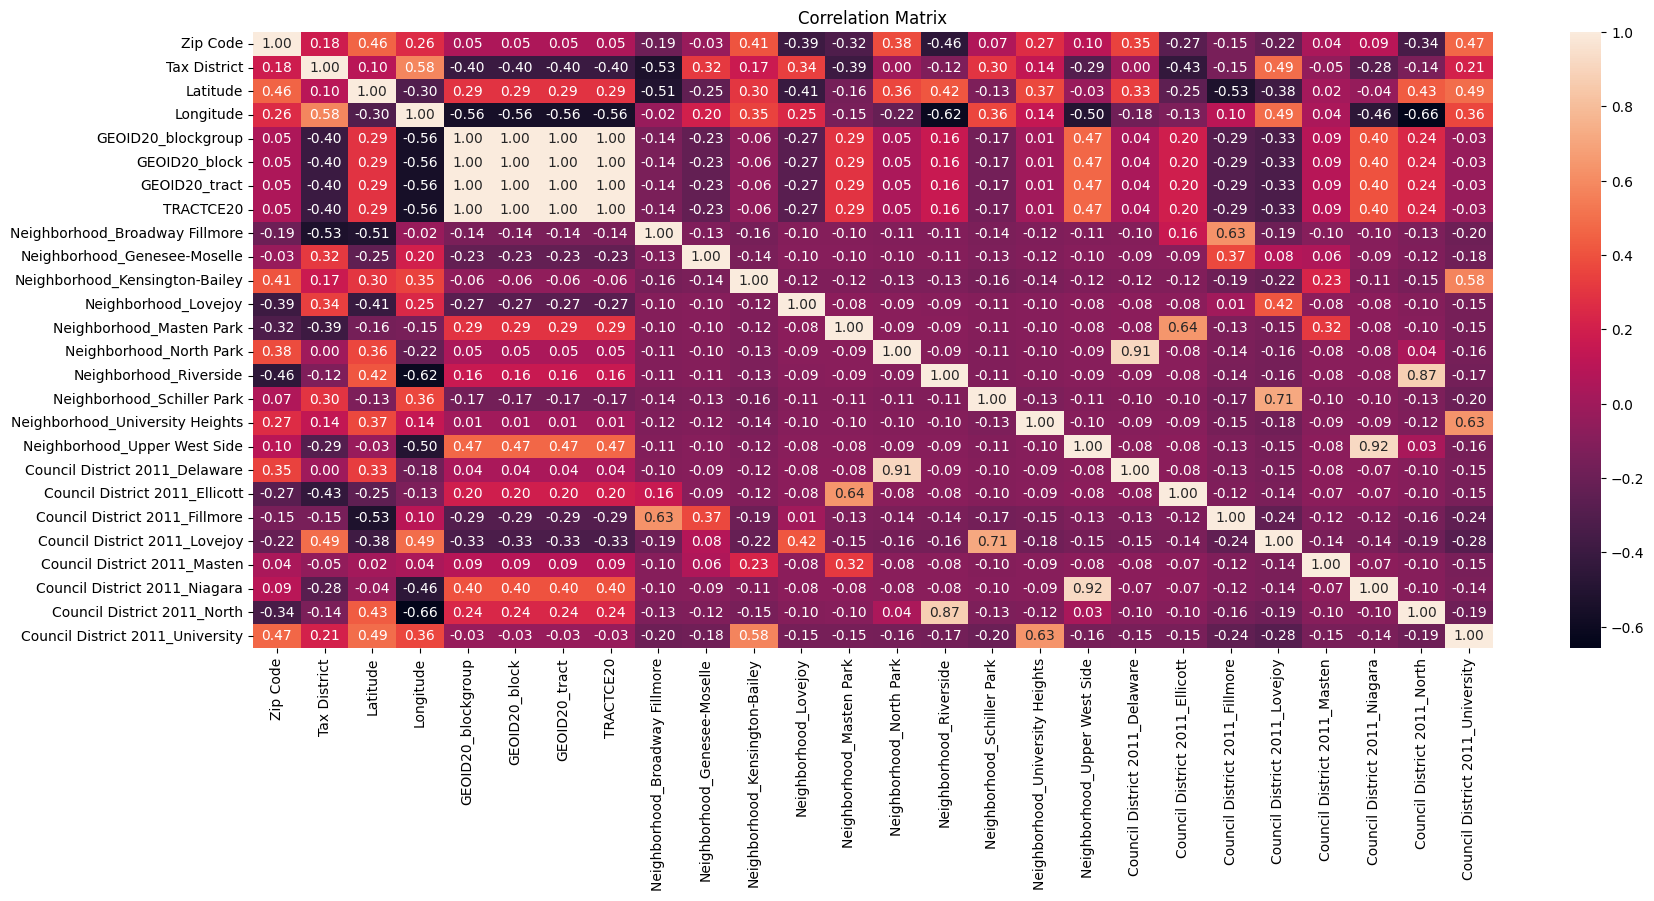

In [73]:
#correlation matrix
matrix = categorical_df.corr()

#plotting the correlation matrix using seaborn
plt.figure(figsize=(20,8))
sns.heatmap(matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [74]:
y = categorical_df['Council District 2011_University']

X = categorical_df[['Zip Code','Tax District', 'Latitude']].values


In [75]:
samples = X.shape[0]
train_size = int(samples*0.8) #80% training and 20% testing

#spit it 80/20
X_train = X[0:train_size]
y_train = y[0:train_size].values.reshape(-1,1)
X_test = X[train_size:]
y_test = y[train_size:].values.reshape(-1,1)

print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)
print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)

X_train shape: (9112, 3)
y_train shape: (9112, 1)
X_test shape: (2278, 3)
y_test shape: (2278, 1)


In [76]:
#normalize the train and test data

#X_train
min_value_x_train = np.min(X_train, axis=0)
max_value_x_train = np.max(X_train, axis=0)
X_train = (X_train - min_value_x_train) / (max_value_x_train - min_value_x_train)

#X_test
min_value_x_test = np.min(X_test, axis=0)
max_value_x_test = np.max(X_test, axis=0)
X_test = (X_test - min_value_x_test) / (max_value_x_test - min_value_x_test)

# print(categorical_data.min())
# print(min_value)
# print(categorical_data.max())
# print(max_value)

print(X_train)

[[0.25531915 0.27272727 0.37256181]
 [0.38297872 0.18181818 0.22748348]
 [0.38297872 0.81818182 0.43953479]
 ...
 [0.55319149 0.81818182 0.48286383]
 [0.25531915 0.36363636 0.49027672]
 [0.55319149 0.81818182 0.45487941]]


Using Logistic regression. Code from part 2

In [77]:
from utils import *

loss_values = []

class LogitRegression():

  def __init__(self, learning_rate=0.001, iterations=1000):
    self.learning_rate = learning_rate
    self.iterations = iterations
    self.weights = None
    self.bias = None

  def sigmoid(self, z):
    sigmaFunc = 1 / (1 + np.exp(-z))
    return sigmaFunc

  def cost(self, y, h, n):
    N = n
    objective_function = -(1/N) * np.sum(((y) * np.log(h)) + [(1-y) * np.log(1 - h)])
    # objective_function =-np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
    return objective_function

  def gradient_descent(self, X, y, h, n):
    N = n  # X.shape[0]
    delta =  h - y   # h= sigmoid(w.X + b), pred = h
    dW = np.dot(X.T, delta) / N
    self.weights -= self.learning_rate * dW
    # self.bias -= self.learning_rate * np.mean(delta)

  def fit(self, X, y,n):
    N = n #X.shape
    self.weights = np.random.uniform(0,1)   #(0, 1, size=(d, 1))
    self.bias = 0.1

    # loss_values = []

    for i in range(self.iterations):
      z = np.dot(X,self.weights) + self.bias  #value for z in sigmod function
      h = self.sigmoid(z)
      self.gradient_descent(X, y, h, N)
      loss_values.append(self.cost(y, h, N))

  def predict(self, X):
    z = np.dot(X, self.weights) + self.bias
    h = self.sigmoid(z)
    return np.where(h >= 0.5, 1, 0)

#Train the model
learning_rates = [1e-3, 1e-4, 1e-5]
iterations = [100000]
best_accuracy = 0
good_weights = None

for rate in learning_rates:
  for iter in iterations:
    model = LogitRegression(learning_rate=rate, iterations=iter)
    model.fit(X_train.astype(float), y_train,X.shape[0])

    predictions = model.predict(X_test)
    accuracy = np.mean(predictions == y_test) * 100

    print(f"The learning Rate: {rate}, The iterations: {iter}, The accuracy: {accuracy:.2f}%")

    if accuracy > best_accuracy:
      best_accuracy = accuracy
      good_weights = model.weights

  # # Plot loss graph
  # plt.fig
  # plt.plot(loss_values)
  # print(loss_values)
  # plt.xlabel("Number of Iterations")
  # plt.ylabel("Loss")
  # plt.title("Loss Graph")
  # plt.show()

print("Best Accuracy:",best_accuracy)
print("Best Weights:",good_weights)

# pickle.dump( good_weights, open( "Rebecca_Abraham_assignment1_part2.pickle", "wb" ) )


The learning Rate: 0.001, The iterations: 100000, The accuracy: 76.73%
The learning Rate: 0.0001, The iterations: 100000, The accuracy: 77.48%
The learning Rate: 1e-05, The iterations: 100000, The accuracy: 22.52%
Best Accuracy: 77.48024582967516
Best Weights: [[-0.19819396 -0.19819393 -0.19819392]
 [-0.68637744 -0.68637795 -0.68637742]
 [-0.22709117 -0.22709117 -0.22709157]]


## Using other techniques for Penguin dataset

However while using logistic regression I did get around 90% plus accuracy. Still trying other techniques to see what changes

In [78]:
#using the dataset after preprocessing in part 1
penguins_df = pd.read_csv("penguins_preprocessed.csv")

In [79]:
y = penguins_df['island_Torgersen']
print(y.shape)

X = penguins_df[['bill_depth_mm','bill_length_mm','body_mass_g','species_Adelie','flipper_length_mm']].values

print(X.shape)


(344,)
(344, 5)


In [80]:

samples = X.shape[0]
train_size = int(samples*0.8) #80% training and 20% testing

#spit it 80/20
X_train = X[0:train_size]
y_train = y[0:train_size].values.reshape(-1,1)
X_test = X[train_size:]
y_test = y[train_size:].values.reshape(-1,1)

print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)
print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)

X_train shape: (275, 5)
y_train shape: (275, 1)
X_test shape: (69, 5)
y_test shape: (69, 1)


In [81]:
#normalize the train and test data

#X_train
min_value_x_train = np.min(X_train, axis=0)
max_value_x_train = np.max(X_train, axis=0)
X_train = (X_train - min_value_x_train) / (max_value_x_train - min_value_x_train)

#X_test
min_value_x_test = np.min(X_test, axis=0)
max_value_x_test = np.max(X_test, axis=0)
X_test = (X_test - min_value_x_test) / (max_value_x_test - min_value_x_test)


<ipython-input-81-b80a0f74b4e7>:11: RuntimeWarning: invalid value encountered in divide
  X_test = (X_test - min_value_x_test) / (max_value_x_test - min_value_x_test)


Linear regression

In [82]:
#reusing the code from part 3
# a) fucntion to calculate the weights
def linearregression_train(X,y):

  X = np.c_[np.ones((X.shape[0], 1)), X]
  first_product = np.dot(X.T,X)  #(𝑿^𝑇 * 𝑿)
  first_product_inverse = np.linalg.inv(first_product) # inverse of first part
  second_product = np.dot(X.T,y)

  #multiply both first and secon products and gives the result for weight
  w = np.dot(first_product_inverse, second_product)

  return w

#b) function to calculate predicitons and mean squared error
def predict(X,w):
  X = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1
  return np.dot(X, w)


def mean_squared_error(actual_targets, predictions):
  total_error = 0.0
  final_mse = 0.0
  for i in range(len(actual_targets)):
    error = predictions[i] - actual_targets[i]
    total_error += (error ** 2)
  final_mse = total_error / float(len(actual_targets))
  return final_mse


Not sure why there is an error with the normalization of x_test above which give nan for the mse of test data. But it workedd before in part 3 so not surewhat happened here

In [83]:
#calling the functions to train
w = linearregression_train(X_train, y_train)
y_predicted_train = predict(X_train, w)
y_predicted_test = predict(X_test, w)
print(w)
mse_train = mean_squared_error(y_train, y_predicted_train)
mse_test = mean_squared_error(y_test, y_predicted_test)


print(f"MSE (Train): {mse_train}")
print(f"MSE (Test): {mse_test}")


[[ 0.02461457]
 [ 0.18066586]
 [ 0.17368301]
 [-0.13739352]
 [ 0.32051485]
 [ 0.05009631]]
MSE (Train): [0.12376171]
MSE (Test): [nan]


Ridge Regression

In [84]:
lambda_value = 1000 # started with 1 and went even to 100 and no change then changed it so this high value to see a difference

def ridgeRegression(X, y):
  X = np.c_[np.ones((X.shape[0], 1)), X]
  I = np.identity(X.shape[1])
  first_product = np.dot(X.T,X)  #(𝑿^𝑇 * 𝑿)
  sum = first_product + (lambda_value * I) #(𝑿^𝑇 * 𝑿 + 𝝀𝑰)
  first_product_inverse = np.linalg.inv(sum) # inverse of first part
  second_product = np.dot(X.T,y)

  #multiply both first and secon products and gives the result for weight
  w = np.dot(first_product_inverse, second_product)

  # print(w)
  return w

def predict(X,w):
  X = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1
  return np.dot(X, w)

def regularized_squared_error(actual_targets, predictions, w):
  total_error = 0.0
  final_squared_loss = 0.0
  for i in range(len(actual_targets)):
    error = predictions[i] - actual_targets[i]
    total_error = total_error + (error ** 2)

  final_squared_loss = (1/(2 * len(actual_targets))) * total_error + (0.5 * lambda_value * np.sum(w[1:] ** 2))
  # final_squared_loss = 0.5 * np.sum((actual_targets - predictions) ** 2) + 0.5 * lambda_value * np.sum(w ** 2)
  return final_squared_loss

In [85]:
#calling the functions to train
w = ridgeRegression(X_train, y_train)
print(w)
y_predicted_train = predict(X_train, w)
y_predicted_test = predict(X_test, w)

squared_loss_train = regularized_squared_error(y_train, y_predicted_train,w)
squared_loss_test = regularized_squared_error(y_test, y_predicted_test, w)

#was a bit confused with which squared loss to use so calculated both mse and the ridge regularized loss too
mse_train = mean_squared_error(y_train, y_predicted_train)
mse_test = mean_squared_error(y_test, y_predicted_test)

print(f"MSE (Train): {mse_train}")
print(f"MSE (Test): {mse_test}")

print(f"Squared loss (Train): {squared_loss_train}")
print(f"Squared loss (Test): {squared_loss_test}")



[[0.03018545]
 [0.00228184]
 [0.00272846]
 [0.01305414]
 [0.0377988 ]
 [0.02310357]]
MSE (Train): [0.16031197]
MSE (Test): [nan]
Squared loss (Train): [1.15294924]
Squared loss (Test): [nan]


Based on the Linear and ridge regression it looks like the mse values show that the loss is less and that can be agreed with the accuracy we got for the logistic regression model in part 1.

References:

In [86]:
# Preprocessed data from Part 1

In [87]:
# Code for Linear and Ridge from Part 3